In [1]:
import networkx as nx
import powerlaw as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter 

In [2]:
G = nx.read_edgelist('Wiki-Vote.txt', create_using=nx.DiGraph)

In [3]:
print(G)
# G.in_degree()

DiGraph with 7115 nodes and 103689 edges


In [4]:
def generate_ccdf_in(G):
   dd = Counter(dict(G.in_degree).values())
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")

   results = pl.Fit(ccdf["ccdf"])
   k_min = ccdf[ccdf["ccdf"] == results.power_law.xmin]["k"]
   print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))

   # Let's plot the best fit.
   ccdf["fit"] = (10 ** results.power_law.Kappa) * (ccdf["k"] ** -results.power_law.alpha)
   ax = plt.gca()
   ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True, ax = ax)
   ccdf.plot(kind = "line", x = "k", y = "fit", color = "#377eb8", loglog = True, ax = ax)
   plt.ylim(bottom=0.0001)
   return None

In [5]:
def logscatter_in(G):
    d = dict(G.in_degree)
    # turn into a count of degree (the values of the dict)
    counter = Counter(d.values())
    # Make it into a dataframe
    counter = pd.DataFrame(list(counter.items()), columns = ("k", "count")).sort_values(by = "k")
    plt.scatter(np.log2(counter['k']), np.log2(counter['count']), c = 'blue', s=10, alpha=0.5)
    plt.title("log-log degree distr.")
    plt.savefig("loglog_degree_distribution.png")
    plt.show()
    return None


C:\Users\lilir\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


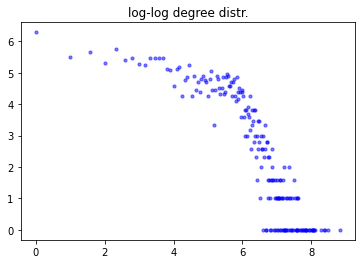

In [6]:
logscatter_in(G)

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 10.9097 x ^ -4.4276 (k_min = 26)


C:\Users\lilir\AppData\Local\Temp\ipykernel_17180\3510536466.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


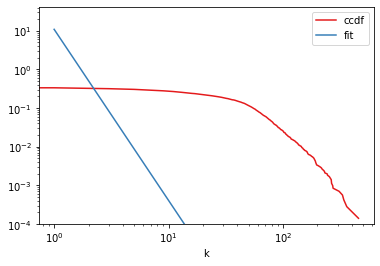

In [7]:
generate_ccdf_in(G)

In [8]:
def generate_ccdf_out(G):
   dd = Counter(dict(G.out_degree).values())
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")
   
   results = pl.Fit(ccdf["ccdf"])
   k_min = ccdf[ccdf["ccdf"] == results.power_law.xmin]["k"]
   print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))

   # Let's plot the best fit.
   ccdf["fit"] = (10 ** results.power_law.Kappa) * (ccdf["k"] ** -results.power_law.alpha)
   ax = plt.gca()
   ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True, ax = ax)
   ccdf.plot(kind = "line", x = "k", y = "fit", color = "#377eb8", loglog = True, ax = ax)
   plt.ylim(bottom=0.0001)
   return None

def logscatter_out(G):
    d = dict(G.out_degree())
    # turn into a count of degree (the values of the dict)
    counter = Counter(d.values())
    # Make it into a dataframe
    counter = pd.DataFrame(list(counter.items()), columns = ("k", "count")).sort_values(by = "k")
    plt.scatter(np.log2(counter['k']), np.log2(counter['count']), c = 'blue', s=10, alpha=0.5)
    plt.title("log-log degree distr.")
    plt.savefig("loglog_degree_distribution.png")
    plt.show()
    return None

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 10.5675 x ^ -2.7601 (k_min = 28)


C:\Users\lilir\AppData\Local\Temp\ipykernel_17180\511392278.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


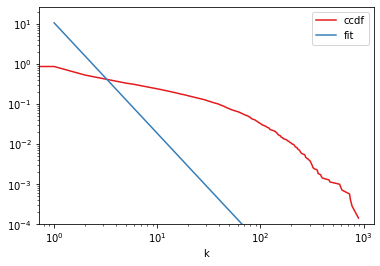

In [9]:
generate_ccdf_out(G)

C:\Users\lilir\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


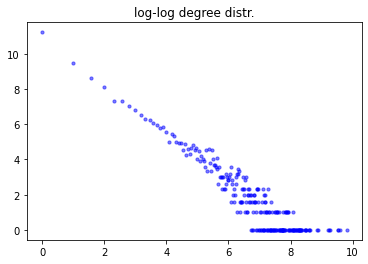

In [10]:
logscatter_out(G)

In [11]:
#Clustering coefficient
cc = nx.transitivity(G)
print(f"CC for real network: {cc}")

CC for real network: 0.05285122817867548


In [12]:
def p(Graph):
    return len(Graph.edges) / ((len(Graph.nodes) * (len(Graph.nodes)-1)) / 2)

print("The parameter p for the graph: ", p(G))

The parameter p for the graph:  0.004097075022161917


In [13]:
#taking the largest strongly connected component
largest_scc = max(nx.strongly_connected_components(G), key=len)

In [14]:
len(largest_scc)

1300

In [41]:
#edges of lscc
# strongs = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
# for strong in strongs:
#     G.subgraph(strong).edges()

In [16]:
#taking the largest weakly connected component
largest_wcc = max(nx.weakly_connected_components(G), key=len)

In [17]:
len(largest_wcc)

7066

In [18]:
if largest_scc in largest_wcc:
    print(True)

In [19]:
largest_scc.issubset(largest_wcc)

True

- assortativity (**quantitative homophily**) - `-0.08324455771686787` ~ -0.08 - negative assortativity/disassortativity - nodes with high degrees tend to be connected to nodes with low degrees
- degree correlation - the extent to which nodes in a network tend to connect to nodes with a similar degree; got the same value as assortativity - `-0.08324455771686744`

In [20]:
ass = nx.degree_assortativity_coefficient(G)
ass 
#assortativity but as the val is negative -> disassortativity

-0.08324455771686787

In [21]:
degkor = nx.degree_pearson_correlation_coefficient(G)
degkor #degree correlation

-0.08324455771686795

closeness centrality - how close a node is to all other nodes in the network; calculated as the average of the shortest path length from the node to every other node in the network 

In [30]:
clc = nx.closeness_centrality(G) 
#dictionary of closeness centrality values

betweenness centrality - number of shortest paths in a graph that pass through a node divided by the number of shortest paths that exist between every pair of nodes in a graph

In [37]:
bnc = nx.betweenness_centrality(G)
#dictionary of betweenness centrality values

In [39]:
# clc
# print(bnc)